In [89]:
#1차원 이산확률분포
import numpy as np
import matplotlib.pyplot as plt

x_set = np.array([1,2,3,4,5,6])


def f(x):
    if x in x_set:
        return x/21
    else:
        return 0
X =[x_set, f]

In [90]:
prob = np.array([f(x_k) for x_k in x_set])
print(prob, '\n')
dict(zip(x_set, prob))

[0.04761905 0.0952381  0.14285714 0.19047619 0.23809524 0.28571429] 



{1: 0.047619047619047616,
 2: 0.09523809523809523,
 3: 0.14285714285714285,
 4: 0.19047619047619047,
 5: 0.23809523809523808,
 6: 0.2857142857142857}

<BarContainer object of 6 artists>

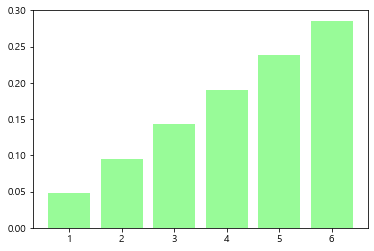

In [91]:
plt.bar(x_set,prob,color='palegreen')

In [92]:
np.all(prob>=0)

True

In [93]:
np.sum(prob)

0.9999999999999999

In [94]:
#누적분포함수
def F(x):
    return np.sum([f(x_k) for x_k in x_set if x_k <= x])

In [95]:
F(3)

0.2857142857142857

In [96]:
# 확률변수의 변환: 확률변수 X에 2를 곱하고 3을 더한 2X+3도 확률변수가 된다.
y_set = np.array([2* x_k +3 for x_k in x_set])
prob = np.array([f(x_k) for x_k in x_set])
dict(zip(y_set , prob))

{5: 0.047619047619047616,
 7: 0.09523809523809523,
 9: 0.14285714285714285,
 11: 0.19047619047619047,
 13: 0.23809523809523808,
 15: 0.2857142857142857}

In [97]:
# 1차원 이산형 확률변수의 지표
# 평균 : 확률변수의 평균은 확률변수의 중심을 나타내는 지표가 되며 기댓값이라고도 부른다
np.sum([x_k * f(x_k) for x_k in x_set])

4.333333333333333

In [98]:
#확률변수의 기댓값은 확률변수를 무제한 시행하여 얻은 실현값의 평균
sample = np.random.choice(x_set, int(1e6), p=prob)
np.mean(sample)

4.332539

In [99]:
# 일반화
def E(X,g=lambda x :x):
    x_set, f = X 
    return np.sum([g(x_k) * f(x_k) for x_k in x_set])

In [100]:
E(X)

4.333333333333333

In [101]:
E(X , g=lambda x: 2*x+3)

11.666666666666664

In [102]:
# 기댓값의 선형성
2 * E(X) + 3

11.666666666666666

In [103]:
# 분산
mean = E(X)
np.sum([(x_k - mean)**2 * f(x_k) for x_k in x_set])

2.2222222222222223

In [104]:
#일반화
def V(X, g = lambda x:x):
    x_set,f = X
    mean = E(X,g)
    return np.sum([(g(i)-mean)**2 *f(i) for i in x_set])

V(X, lambda x:2*x+3)

8.88888888888889

In [105]:
#분산의 공식
2*2*V(X)

8.88888888888889

In [106]:
# 2차원 이산형 확률분포
x_set = np.arange(2,13)
y_set = np.arange(1,7)

In [107]:
def f_XY(x,y):
    if 1 <= y <=6 and 1 <= x-y <=6:
        return y* (x-y)/441
    else:
        return 0    

In [108]:
XY=[x_set,y_set, f_XY]

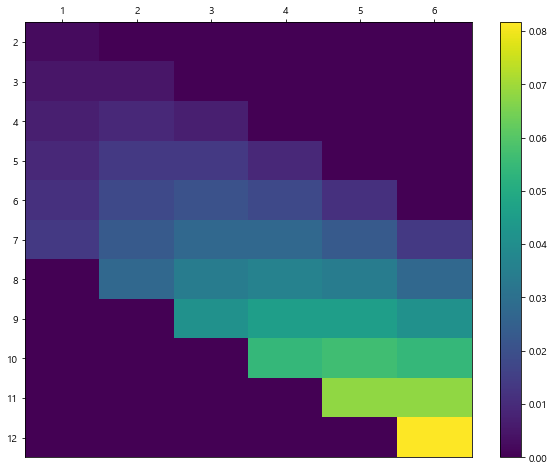

In [109]:
prob = np.array([[f_XY(x_i,y_j) for y_j in y_set]for x_i in x_set])
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
c=ax.pcolor(prob)
x = ax.pcolor(prob)
ax.set_xticks(np.arange(prob.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(prob.shape[0]) + 0.5, minor=False)
ax.set_xticklabels(np.arange(1,7) , minor=False)
ax.set_yticklabels(np.arange(2,13) , minor=False)
#y축을 내림차순으로 역전
ax.invert_yaxis()
#x축 눈금을 그래프 위쪽에 표시
ax.xaxis.tick_top()
fig.colorbar(c,ax=ax)

In [110]:
np.all(prob >=0)

True

In [111]:
np.sum(prob)

1.0

In [112]:
#주변확률분포 : 확률변수 (X,Y)는 결합확률분포에 의해 동시에 정의되지만 개별 확률변수에만 흥미가 있을 수 있다.
# 확률변수 X만의 움직임. 즉 확률변수 X의 확률함수를 알고 싶은 상황
def f_X(x):
    return np.sum(f_XY(x,y_k) for y_k in y_set)

In [113]:
def f_Y(y):
    return np.sum([f_XY(x_k,y) for x_k in x_set])

In [114]:
X = [x_set, f_X]
Y = [y_set, f_Y]

In [115]:
X

[array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <function __main__.f_X(x)>]

In [116]:
Y

[array([1, 2, 3, 4, 5, 6]), <function __main__.f_Y(y)>]

Text(0, 0.5, 'probability')

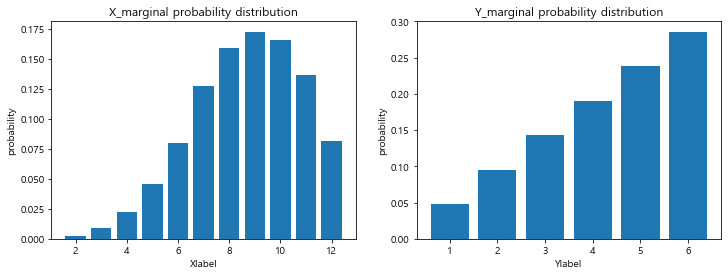

In [117]:
prob_x = np.array([f_X(x_k) for x_k in x_set])
prob_y = np.array([f_Y(y_k) for y_k in y_set])

fig = plt.figure(figsize =(12,4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.bar(x_set,prob_x)
ax2.bar(y_set,prob_y)
ax1.set_title('X_marginal probability distribution')
ax1.set_xlabel('Xlabel')
ax1.set_ylabel('probability')
ax2.set_title('Y_marginal probability distribution')
ax2.set_xlabel('Ylabel')
ax2.set_ylabel('probability')

In [118]:
#2차원 이산형 확률분포의 지표
# 기댓값 
np.sum([x_i * f_XY(x_i,y_j) for x_i in x_set for y_j in y_set])

8.666666666666666

In [119]:
sum=0
for y_j in y_set:
    for x_i in x_set:
        sum+=((x_i*f_XY(x_i,y_j)))
sum

8.666666666666666

In [120]:
def E(XY, g):
    x_set,y_set, f_XY = XY
    return np.sum([g(x_i,y_j) * f_XY(x_i,y_j) for x_i in x_set for y_j in y_set])
mean_X=E(XY,lambda x,y:x)
mean_X

8.666666666666666

In [123]:
E(XY,lambda x,y:y) * mean_X

37.55555555555555

In [124]:
np.sum([x_i  * y_j * f_XY(x_i,y_j) for x_i in x_set for y_j in y_set])

39.77777777777778

In [126]:
a,b =2,3

In [127]:
# 기댓값의 선형성
E(XY , lambda x,y: a*x+ b*y)

30.333333333333332

In [128]:
#분산 : X의 분산이라면 X관한 편차제곱의 기댓값으로 구할 수 있다.
np.sum([(x_i - mean_X)**2 * f_XY(x_i,y_j) for x_i in x_set for y_j in y_set])


4.444444444444444

In [129]:
def V(XY, g ):
    x_set,y_set, f_XY = XY
    mean = E(XY , g)
    return np.sum([(g(x_i,y_j) - mean)**2 * f_XY(x_i,y_j) for x_i in x_set for y_j in y_set])
V(XY,lambda x,y:y)

2.2222222222222223

In [130]:
# 공분산
def Cov(XY):
    x_set, y_set, f_XY = XY
    mean_Y = E(XY, lambda x,y: y)
    mean_X = E(XY, lambda x,y: x)
    return np.sum([(x_i -mean_X) * (y_j - mean_Y) * f_XY(x_i,y_j) for x_i in x_set for y_j in y_set ])

In [131]:
cov_xy=Cov(XY)

In [132]:
V(XY, lambda x,y:a*x+b*y)

64.44444444444444

In [133]:
var_X = V(XY, lambda x,y:x)
var_Y = V(XY, lambda x,y:y)

In [134]:
#분산과 공분산의 공식
a**2 * var_X + b**2 * var_Y + 2*a*b *cov_xy

64.44444444444443

In [135]:
#확률변수의 상관계수 : 공분산을 각각의 표준편차로 나누어 산출
cov_xy/np.sqrt(var_X * var_Y)

0.7071067811865474

대표적인 이산형 확률분포

In [136]:

# 그래프를 위한 사용자 함수
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

linestyles = ['-','--',':']

def E(X,g=lambda x:x):
    x_set, f =X
    return np.sum([g(x_k) * f(x_k) for x_k in x_set])

def V(X, g=lambda x:x):
    x_set, f =X
    mean_X = E(X,g)
    return np.sum([(g(x_k)-mean_X)**2 *f(x_k) for x_k in x_set])

def check_prob(X):  #확률분포를 인수로 가지면 기댓값과 분산 계산 결과를 반환
    x_set, f = X
    prob = np.array([f(x_k) for x_k in x_set])
    assert np.all(prob >= 0), f'minus probability'    #조건식이 True 가 아니면 문구 출력
    prob_sum = np.round(np.sum(prob),6)
    assert prob_sum == 1, f'sum of probability{prob_sum}'
    print(f'expected value {E(X): .4}')
    print(f'variance {(V(X)):.4}')
    
def plot_prob(X): # 확률분포를 인수로 가지며 그 확률변수의 확률함수와 기댓값을 그리기 위한 함수
    x_set, f = X
    prob = np.array([f(x_k) for x_k in x_set])
    fig = plt.figure(figsize=(6,4))
    ax = fig.add_subplot(111)
    ax.bar(x_set, prob, label ='prob', color='lightsteelblue')
    ax.vlines(E(X), 0, 1, label='mean', color='slateblue')
    ax.set_xticks(np.append(x_set, E(X)))
    ax.set_ylim(0,prob.max()*1.2)
    ax.legend()
    

#### 베르누이 분포
- 가장 기본적인 이산형 확률분포로 확률변수가 취할 수 있는 값이 0과1밖에 없는 분포이다.
- 베르누이 분포를 따르는 확률변수의 시행을 베르누이 시행이라 하며 1이 나오면 성공, 0이 나오면 실패
- 동전을 던져 앞면이 나올 확률, 주사위를 한번 굴려 6이 나오지 않을 확률

In [137]:
def Bern(p):
    x_set = np.array([0,1])
    def f(x):
        if x in x_set:
            return p ** x * (1-p) ** (1-x)
        else:
            return 0
    return x_set, f

In [138]:
p=0.3
X=Bern(p)
X

(array([0, 1]), <function __main__.Bern.<locals>.f(x)>)

expected value  0.3
variance 0.21


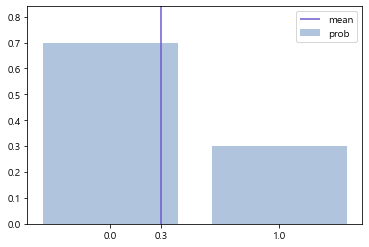

In [139]:
check_prob(X)
plot_prob(X)

In [140]:
rv = stats.bernoulli(p)

In [141]:
rv.pmf(0) , rv.pmf(1)

(0.7, 0.3)

In [142]:
rv.pmf([0,1])

array([0.7, 0.3])

In [143]:
rv.cdf([0,1])

array([0.7, 1. ])

In [144]:
rv.mean(), rv.var()

(0.3, 0.21)

# 이항분포
- 성공확률이 p인 베르누이 시행을 n번 했을 때의 성공 횟수가 따르는 분포

f(x) = $_{n}\mathrm{C}_{x}p^x(1-p)^{n-x}$ $(x \in \{0,1,..,n\}$)

         0                (otherwise)


In [145]:
from scipy.special import comb

def Bin(n,p):
    x_set = np.arange(n+1)
    def f(x):
        if x in x_set:
            
            return comb(n,x) * p **x * (1-p)**(n-x)
        else:
            return 0
    return x_set, f

In [146]:
n=10
p-0.3
X=Bin(n,p)
X

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <function __main__.Bin.<locals>.f(x)>)

In [147]:
# [과제] 동전을 10번 던져 앞면이 3번 나오는 확률의 이항분포의 기대값과 분산을 구하세요.
Bin_E= np.sum([x_i * f(x_i) for x_i in x_set])
print("이항분포의 기댓값: ", Bin_E )
print("이항분포의 분산: ", np.sum([(x_i - Bin_E)**2 * f(x_i) for x_i in x_set]))

이항분포의 기댓값:  30.904761904761905
이항분포의 분산:  1881.5071806500378


expected value  3.0
variance 2.1


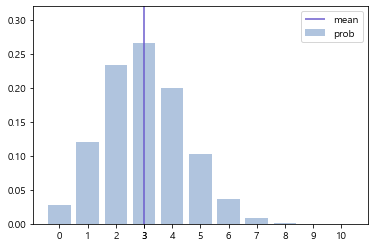

In [148]:
# [과제] 상기 이항분포의 확률함수와 기댓값을 시각화 하세요.
check_prob(X)
plot_prob(X)

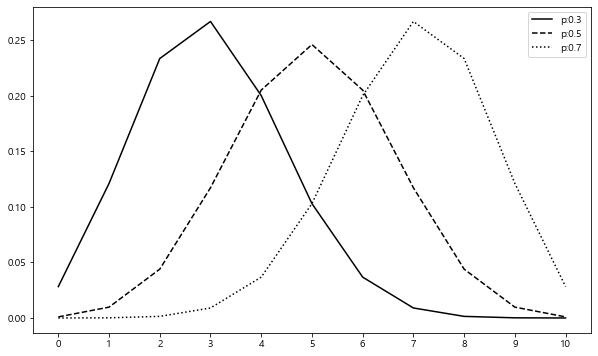

In [149]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

x_set = np.arange(n+1)
for p ,ls in zip([0.3 ,0.5, 0.7], linestyles):
    rv = stats.binom(n,p)
    ax.plot(x_set, rv.pmf(x_set), label=f'p:{p}', ls=ls, color='k')
ax.set_xticks(x_set)
ax.legend()
plt.show()

# 기하분포
- 베르누이 시행에서 처음 성공할때까지 시행 횟수가 따르는 분포
- 기하분포의 파라미터는 베르누이 시행의 성공 확률 파라미터 p가 되며 파라미터 p의 기하분포를 Ge(p)로 표기

f(x) = $(1-p)^{x-1}p$ $(x \in \{1,2,3,/,,,\})$
         0                  otherwise
    
- 기하분포의 기댓갓과 분산 : E(x) = 1/p , V(x) = (1-p)/p^2


#### 위키
- 베르누이 시행에서 처음 성공까지 시도한 횟수 X의 분포. 지지집합은 {1, 2, 3...}이다.
- 베르누이 시행에서 처음 성공할 때까지 실패한 횟수 Y=X-1의 분포. 지지집합은 {0, 1, 2, ...}이다.
- 성공확률 p인 베르누이 시행에 대해, n번 시행시 첫 번째 성공을 얻을 확률

    * 예시) 어떤 사람이 운전시험에 합격할 확률을 0.5라할 때 적어도 3번안에 시험에서 합격할 확률은?
        * (1-0.5)^(3-1) * 0.5  = 0.125 

In [150]:
# [과제] 사용자 함수를 구하세요.(단, 확를변수를 1 이상 29 이하인 정수으로 설정)
def Ge(p):
    x_set=np.arange(1,30)
    def f(x):
        if x in x_set:
            return (1-p)**(x-1) * p
        else:
            return 0
    return x_set, f

In [151]:
# [과제] 성공확률이 0.5일때 기하분포의 기댓값과 분산을 구하세요.
p=0.5      #p는 베르누이시행의 성공확률파라미터
X=Ge(p)
print("기하분포의 기댓값: ", 1/0.5)    #기하분포의 기댓값은 1/p
print("기하분포의 분산: ", (1-0.5)/0.5**2)   #분산은 (1-p)/p^2

기하분포의 기댓값:  2.0
기하분포의 분산:  2.0


In [152]:
check_prob(X)

expected value  2.0
variance 2.0


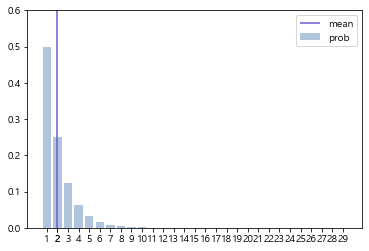

In [153]:
# [과제] 상기 기하분포의 확률함수와 기댓값을 시각화 하세요.
# check_prob(X)
plot_prob(X)       #확률변수값이 커질수록 확률은 지수적으로 감소

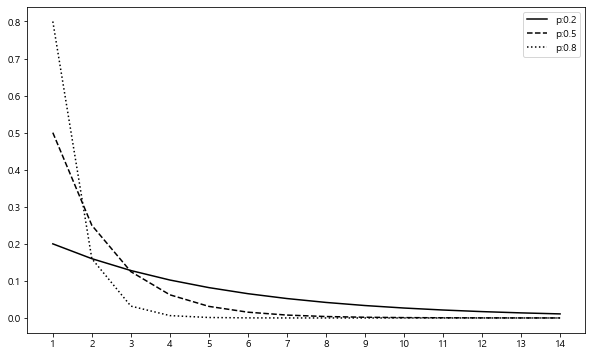

In [154]:
# [과제] 성공확률이 0.2, 0.5, 0.8로 변할 때 확률함수가 변화는 모습을 시각화 하세요
# 베르누이 성공확률 p가 달라져도 그래프의 양상이 지수적으로 감소한다는것을 볼 수 있다.
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

x_set = np.arange(1,15)
for p ,ls in zip([0.2 ,0.5, 0.8], linestyles):
    rv = stats.geom(p)
    ax.plot(x_set, rv.pmf(x_set), label=f'p:{p}', ls=ls, color='k')
ax.set_xticks(x_set)
ax.legend()
plt.show()

expected value  2.0
variance 2.0


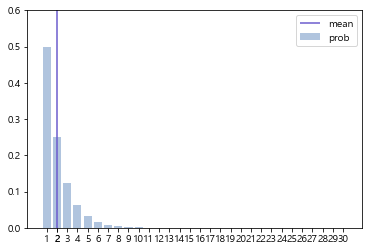

In [155]:
#어떤 사람이 운전시험에 합격할 확률을 0.5라할 때 적어도 30번안에 시험에서 합격할 확률은?
def Ge_1(p):
    x_set=np.arange(1,31)
    def f(x):
        if x in x_set:
            return p*((1-p)**(x-1))
        else:
            return 0
    return x_set, f

p=0.5
X=Ge_1(p)

plot_prob(X) 
check_prob(X)

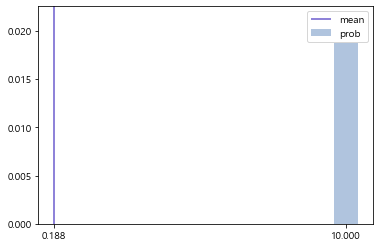

In [156]:
# 빨간공7개 검정공3개가 주머니에 있을때 검정이면 성공 빨강이면 실패
#이때 1번만에 성공할 확률
def Ge_1(p):
    x_set= [10]
    def f(x):
        if x in x_set:
            return p*(1-p)**(x-1)
        else:
            return 0
    return x_set, f
p=0.25
X=Ge_1(p)
plot_prob(X)  

#### 포아송 분포
- 임의의 사건이 단위 시간당 발생하는 건수가 따르는 확률분포이며 포아송 분포의 파라미터는 $\lambda$로 나타낸다.
- 하루에 평균 2건의 교통사고가 발생하는 지역에서 하루 교통사고 발생건수는 Poi(2)를 따른다.

P(X=0) = 2!/0! * $e^{-2}$ = 0.135
- 포아송 분포의 기댓값과 분산은 모두 $\lambda$가 된다.

f(x) = $\lambda^x/x!*e^{-\lambda}$ $(x \in \{0,1,2,...\})$

In [157]:
# [과제] 사용자 함수를 구하세요.(단, 확를변수를 1 이상 19 이하인 정수으로 설정)
import math

def Poi(lam):
    x_set=np.arange(20)
    def f(x):
        if x in x_set:
            return (lam**x) / (math.factorial(x)) * 1/(2.71828182846)**(lam)
        else:
            return 0
    return x_set , f

In [158]:
from scipy.special import factorial

def Poi(lam):
    x_set=np.arange(20)
    def f(x):
        if x in x_set:
            return np.power(lam,x) / factorial(x) *np.exp(-lam)
        else:
            return 0
    return x_set , f

In [159]:
# [과제] 𝜆 가 0.3일때 포아송분포의 기댓값과 분산을 구하세요.
X= Poi(3)
# Poi_E = np.sum(x_i * f(x_i) for x_i in x_set)
# print("포아송 분포의 기댓값: ",Poi_E)
# print("포아송 분포의 분산: ",np.sum((x_i - Poi_E)**2 * f(x_i) for x_i in x_set))
check_prob(X)

expected value  3.0
variance 3.0


In [160]:
X

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 <function __main__.Poi.<locals>.f(x)>)

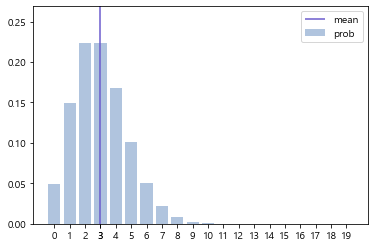

In [161]:
# [과제] 상기 포아송분포의 확률함수와 기댓값을 시각화 하세요.
plot_prob(X)

In [162]:
# [과제]  𝜆 가  3, 5, 8로 변할 때 확률함수가 변화는 모습을 시각화 하세요


In [163]:
# [과제] 베르누이, 이항, 기하, 포아송분포의 사례를 각각 2개씩 제시 및 설명 하세요
#베르누이
#빨간공7개 검정공3개가 주머니에 있을때 빨강이면 성공 검정이면 실패
# 게임에서 강화성공이 뜰 확률 10% 아닐확률 90%

# 이항분포
#4지선다형 문제 5개에서 임의로 답을 선택할때 정답을 선택한 문제수
# 게임에서 강화성공이 뜰 확률 10% 아닐확률 90% 에서 10번돌렸을때 성공할 횟수

#기하분포
#어느 야구선수가 홈런 칠 확률은 0.05라고 한다. 이 야구선수가 6타석만에 홈런칠 확률은?
#어떤 사람이 운전시험에 합격할 확률을 0.25라할 때 적어도 3번안에 시험에서 합격할 확률은?

#포아송 분포
# 고객상담 부서의 1시간 평균 상담건수는 240건일때 1분동안 상담요청 건수가 2건 들어올 경우
# 일일 평균매출이 100만 일때 1시간당 매출이 30일 확률

### 연속형 확률변수
- 이산형 확률변수와 연속형 확률변수의 주된 차이는 확률변수가 취할 수 있는 값이 이산적인가 연속적인가이다.
- 확률변수의 경우 계산 과정에 적분이 포함된다. 적분은 SciPy의 integral모듈을 사용하여 구현한다.

### 연속형 확률분포와 확률밀도함수
- 특정값이 될 확률은 0, 특정 값이 범위에 들어갈 확률은 확률밀도함수를 적분하여 계산(적분은 곡선 아래 면적의 크기)
- 정규분포는 연속확률분포로 가장 자주 쓰이는 확률분포, 모양은 평균을 중심으로 하나의 봉우리 형태를 띄며 한 집단의 많은 사람들의 키, 몸무게, 시험성적 등의 데이터에 잘 나타나는 분포
- 누적분포함수: 확률분포에서 얻은 확률변수 3 이하가 되는 확률. cumulative density function 
###  stats.norm.cdf(loc=4,scale=0.8,x=3)
- 정규분포의 확률밀도 계산
   * 확률변수 3일 때의 확률밀도 N(3|4, 0.8**2)
### stats.norm.pdf(loc=4,scale=0.8,x=3) 
Probability density function
- 하측확률 : '확률변수 x가 N보다 낮을 확률은 M퍼센트이다'에서 N을 고정하고 M을 구하는 경우 
    * 이 때의 M이 하측확률이며 M(확률)을 고정하고 N(변수)을 구하는 경우*이때의 N이 퍼센트포인트 하측확률이 2.5%가 되는 퍼센트 포인트
- stats.norm.pdf(x=x)로 하여 loc와 scale을 지정하지 않을 경우 표준정규분포가 됨. probability density function
- stats.norm.rvs()함수는 정규확률분포로 부터 난수 생성


In [164]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from scipy import stats
import scipy as sp
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Text(0.5, 1.0, '확률밀도함수')

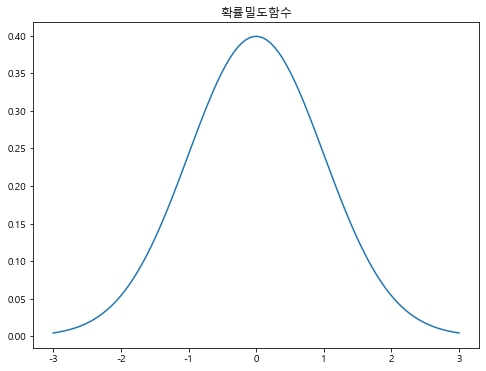

In [201]:
from matplotlib import rc
rc('font',family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False
rv = stats.norm(loc=0,scale=1)
xx = np.linspace(-3,3,100)
pdf = rv.pdf(xx)
plt.figure(figsize=(8,6))
plt.plot(xx,pdf)
plt.title('확률밀도함수')

Text(0.5, 1.0, '누적분포함수')

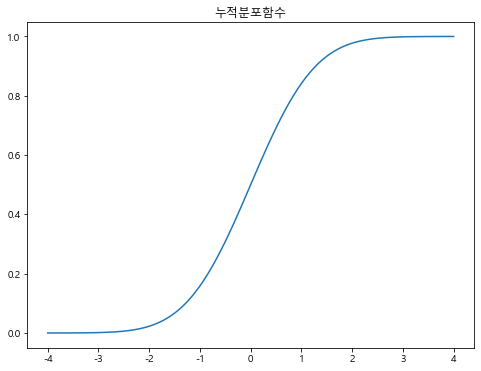

In [202]:
xx = np.linspace(-4,4,100)
cdf = rv.cdf(xx)
plt.figure(figsize=(8,6))
plt.plot(xx,cdf)
plt.title('누적분포함수')


In [167]:
x_range = np.array([0,1])
def f(x):
    if x_range[0] <= x <=x_range[1]:
        return 2 * x
    else:
        return 0
    
X = [x_range, f]
    

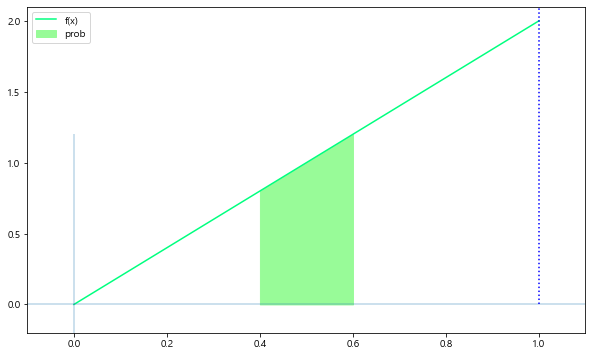

In [168]:
xs = np.linspace(x_range[0],x_range[1],100)
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

ax.plot(xs, [f(x) for x in xs], label="f(x)", color="springgreen")
ax.hlines(0,-0.2,1.2,alpha=0.3)
ax.vlines(0,-0.2,1.2,alpha=0.3)
ax.vlines(xs.max(),0,2.2,linestyles=":",color="b")
#
xs = np.linspace(0.4,0.6,100)
ax.fill_between(xs,[f(x) for x in xs], label="prob", color="palegreen")

ax.set_xticks(np.arange(-0.2,1.3,0.2))
ax.set_xlim(-0.1, 1.1)
ax.set_ylim(-0.2,2.1)
ax.legend()

In [169]:
#첫번째 인수는 피적분 함수, 두번째인수는 세번째 인수는 적분범위
#quad 함수는 적분값과 추정오차 반환
integrate.quad(f, 0.4, 0.6)

(0.19999999999999996, 2.2204460492503127e-15)

연속형 확률변수에서는 확률의 성질이 수식을 만족해야함
- f(x)가 항상 0이상의 값을 취함   = 확률은 음수일수 없다
- f(x)에 대하여 무한대 범위의 적분 결과는 1   = 확률의 합은 1

In [170]:
from scipy.optimize import minimize_scalar

res = minimize_scalar(f)
res.fun # 함수의 최솟값은 fun이라는 인스턴스 변수로 구함

0

In [171]:
integrate.quad(f,-np.inf,np.inf)[0]

1.0

In [172]:
#정규분포의 확률밀도 계산
#확률변수 3일때 확률밀도 N(3|4.0, 0.8**2)
x=3
mu = 4
sigma = 0.8 

1/(np.sqrt(2* np.pi * sigma **2)) * sp.exp(-((x-mu)**2) / (2 * sigma**2))

0.22831135673627742

In [173]:
stats.norm.pdf(loc=4,scale=0.8,x=3)

0.2283113567362774

In [174]:
stats.norm.pdf(loc=0,scale=1,x=1) # 표준정규분포에서 x가 1일때 값

0.24197072451914337

In [175]:
# 정규분포 인스턴스 생성
norm_dist = stats.norm(loc=4,scale=0.8)
norm_dist.pdf(x=3)

0.2283113567362774

In [176]:
x_plot = np.arange(1,7.1,0.1)
x_plot

array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2,
       2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5,
       3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8,
       4.9, 5. , 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1,
       6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7. ])

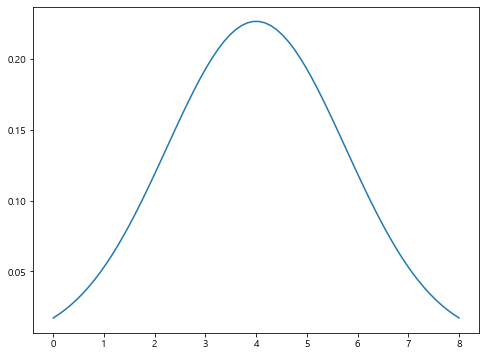

In [177]:
mu = np.mean(x_plot)
std = np.std(x_plot)
rv = stats.norm(loc = mu,scale = std)
xx = np.linspace(0,8,70)    # 0부터 8까지 70개로 나눔
pdf = rv.pdf(xx)
plt.figure(figsize=(8,6))
plt.plot(xx,pdf)

In [178]:
%%time
# 표본이 어떤값 이하가 되는 비율
np.random.seed(1)
simulated_sample = stats.norm.rvs(loc = 4, scale=0.8,size=100000)
simulated_sample[:10]

Wall time: 2.96 ms


array([5.29947629, 3.51059487, 3.5774626 , 3.1416251 , 4.6923261 ,
       2.15876904, 5.39584941, 3.39103448, 4.25523128, 3.8005037 ])

In [179]:
import pandas as pd
df = pd.DataFrame(simulated_sample)
df.describe()

,0
count,100000.000000
mean,4.004202
std,0.798667
min,0.538490
25%,3.465533
50%,4.004800
75%,4.539819
max,7.334494


In [180]:
# Q. 3보다 작은 샘플의 합계와 3이하가 되는 확률

print(df.loc[df[0]<=3].sum())
print(len(df.loc[df[0]<=3])/len(simulated_sample))

0    27151.549504
dtype: float64
0.10371


In [181]:
#누적분포함수: 확률분포에서 얻은 확률변수 3이하가 되는 확률(loc=4,scale=0.8)
rv=stats.norm(loc=4,scale=0.8)
# rv=stats.norm.cdf(loc=4,scale=0.8, x=3)
rv.cdf(3)

0.10564977366685535

In [182]:
# 정규분포는 평균에 대해 좌우대칭 
# 데이터가 평균값 이하가 될 확률은? 50%
rv=stats.norm.cdf(loc=4, scale=1 ,x=4)
rv

0.5

In [183]:
#하측확률: '확률변수 X가 N보다 작을 화률은 M퍼센트이다' 에서 M을 고정하고 N을 구하는 경우
# 하측확률 -> 퍼센트포인트
stats.norm.ppf(loc=4,scale=0.8,q=0.025)

2.4320288123679563

In [184]:
# 퍼센트포인트 -> 하측확률
stats.norm.cdf(loc=4, scale=0.8, x=2.4320288123679563)

0.024999999999999977

In [185]:
# 하측확률이 50%가 되는 퍼센트포인트는 평균과 일치
stats.norm.ppf(loc=4, scale=0.8, q=0.5)

4.0

In [203]:
#[과제] 평균이 100, 표준편차 10인 정규분포에서 하측확률이 0.3일 경우의 퍼센트포인트를 구하고 그 ppf를 적용하여 하측확률을 구하세요


In [ ]:
#[과제]상기 정규분포의 확률밀도함수와 누적분포함수를 시각화하여 하측확률과 pp간의 관계를 구하시오

대표적인 연속형 확률분포

In [209]:
from scipy import stats, integrate
# from scipy

linestyels=['-','--',':']

def E(X, g=lambda x:x):
    x_range , f =X
    def integrand(x):
        return g(x) * f(x)
    return integrate.quad(integrand, -np.inf,np.inf)[0]

def V(X, g=lambda x:x):
    x_ragne, f =X
    mean = E(X,g)
    def integrand(x):
        return (g(x) - mean) **2 *f(x)
    return integrate.quad(integrand, -np.inf , np.inf)[0]

def check_prob(X):
    x_range , f =X
    f_min = minimize_scalar(f).fun
    assert f_min >= 0 , 'density function is minus value'
    prob_sum = np.round(integrate.quad(f,-np.inf, np.inf)[0],6)
    assert prob_sum ==1 , f'sum of probability is {prob_sum}'
    print(f'expected value {E(X):.3f}')
    print(f'variance {V(X): .3f}')
    
def plot_prob(X,x_min,x_max):
    x_range, f =X
    def F(x):
        return integrate.quad(f,-np.inf,x)[0]
    xs = np.linspace(x_min,x_max,100)
    fig = plt.figure(figsize=(10,6))
    ax = fig.add_subplot(111)
    ax.plot(xs,[f(x) for x in xs], label='f(x)', color='rebeccapurple')
    ax.plot(xs, [F(x) for x in xs], label='F(x)', ls='--',color='purple')
    ax.legend()

#### 정규분포
- 통계분석에서 자주 사용되는 중요한 확률분포로 자연계에서 일어나는 수많은 현상을 표현. 가우스분포라고도 부름
- 정규분포가 취할 수 있는 값은 실수 전체로 파라미터는 평균과 분산 두가지이다.

In [190]:
def N(mu, sigma):
    x_range = [-np.inf, np.inf]
    def f(x):
        return  1/ (np.sqrt(2* np.pi*sigma**2)) *  np.exp((-(x-mu)**2) / (2*sigma**2))
                                                          
    return x_range,f

In [191]:
mu, sigma =2, 0.5
X =N(mu,sigma)
check_prob(X)

expected value2.000
variance  0.250


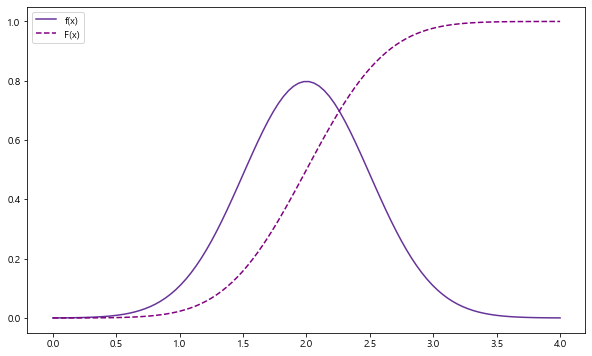

In [192]:
plot_prob(X,0,4)

In [193]:
rv = stats.norm(2,0.5)

In [194]:
#기댓값과 분산
rv.mean(), rv.var()

(2.0, 0.25)

In [195]:
#밀도함수  
rv.pdf(2)

0.7978845608028654

In [196]:
# 분포함수: 확률변수 x가 입력값보다 작은값이 되는 확률P
rv.cdf(1.7)

0.27425311775007355

In [197]:
# isf메서드 : 상위 100a%점 
rv.isf(0.3)   #상위 30%

2.2622002563540207

In [198]:
# 90% 구간을 구하세요
rv.interval(0.9)

(1.1775731865242636, 2.822426813475736)

In [199]:
# 또는  하위 5% , 상위 5%
rv.isf(0.95) , rv.isf(0.05) 

(1.1775731865242638, 2.8224268134757367)

In [200]:
#pp가 2일때 하측확률
rv.cdf(x=2)

0.5

In [ ]:
# [과제] N(mean, sigma**2) 파라미터를 각각 (0,1), (0,4), (1,1)로 변경할 때의 정규분포를 비교할 수 있도록 시각화 하세요 

#### 지수분포
- 어떤 사건이 발생하는 간격이 따르는 분포이며 확률변수가 취할 수 있는 값은 0이상의 실수
- 지수분포의 파라미터는 $\lambda$로 양의 실수이며 EX($\lambda$)로 표기한다.
-  EX($\lambda$)는 단위시간당 평균 $\lambda$번 발생하는 사건의 발생 간격에 따르는 확률분포이다.

In [205]:
def Ex(lam):
    x_range = [0,np.inf]
    def f(x):
        if x >=0:
            return lam * np.exp(-lam * x)
        else:
            return 0
    return x_range, f

In [210]:
lam = 3
X = Ex(lam)
check_prob(X)

expected value 0.333
variance  0.111


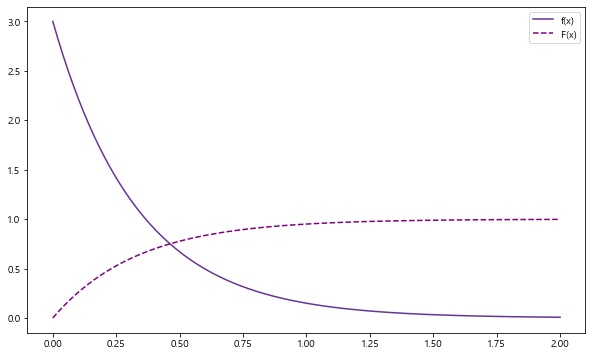

In [212]:
plot_prob(X, 0, 2)

In [ ]:
# [과제] 파라미터 람다가 1,2,3으로 변경시 지수분포의 확률분포함수를 시각화 하세요.

#### 카이제곱분포
- $Z_1, Z_2, ... Z_n$이 서로 독립이고 N(0,1)을 따르고 있을 떄 그 제곱합의 확률분포을 자유도가 n인 카이제곱분포라고 한다.
- 카이제곱분포는 분산의 구간 추정이나 독립성 검정에서 사용되는 확률분포이다.